In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


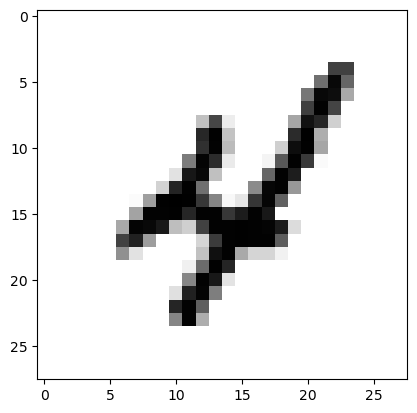

In [12]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

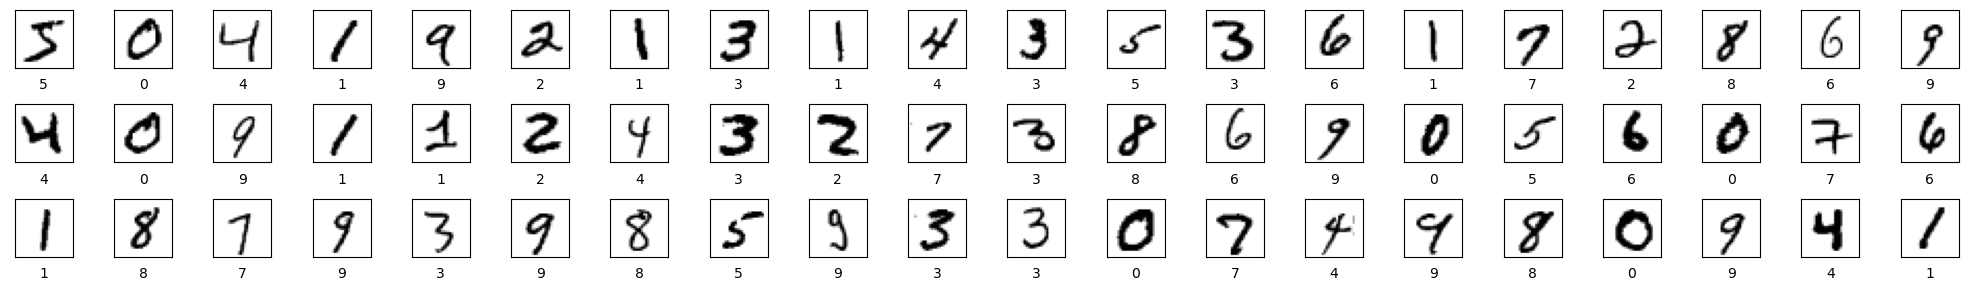

In [13]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

Image (#9): Which is digit '4'


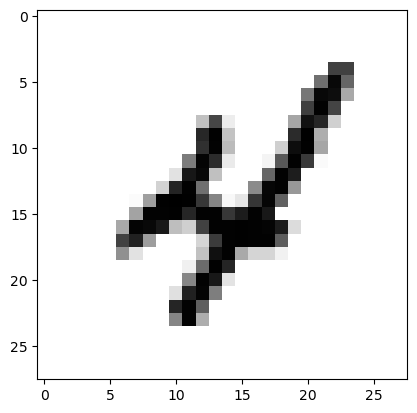

In [14]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [15]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
a = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 3s 4ms/step - loss: 0.6328 - accuracy: 0.8426 - val_loss: 0.3756 - val_accuracy: 0.8992
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 0.3509 - accuracy: 0.9050 - val_loss: 0.3263 - val_accuracy: 0.9093
Epoch 3/5
657/657 [==============================] - 3s 4ms/step - loss: 0.3129 - accuracy: 0.9127 - val_loss: 0.3074 - val_accuracy: 0.9135
Epoch 4/5
657/657 [==============================] - 2s 4ms/step - loss: 0.2950 - accuracy: 0.9172 - val_loss: 0.2965 - val_accuracy: 0.9177
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.9234

Test accuracy: 0.9233999848365784


In [17]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error', 
    metrics=['accuracy']
)
b = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 3s 4ms/step - loss: 27.3419 - accuracy: 0.9228 - val_loss: 27.4633 - val_accuracy: 0.9197
Epoch 2/5
657/657 [==============================] - 2s 4ms/step - loss: 27.3416 - accuracy: 0.9230 - val_loss: 27.4631 - val_accuracy: 0.9189
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 27.3413 - accuracy: 0.9226 - val_loss: 27.4628 - val_accuracy: 0.9186
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 27.3409 - accuracy: 0.9222 - val_loss: 27.4623 - val_accuracy: 0.9186
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 27.3230 - accuracy: 0.9152

Test accuracy: 0.9151999950408936


In [18]:
model.compile(
    optimizer='RMSProp',
    loss='mean_squared_error', 
    metrics=['accuracy']
)
c = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 4s 4ms/step - loss: 27.3020 - accuracy: 0.4427 - val_loss: 27.4069 - val_accuracy: 0.2961
Epoch 2/5
657/657 [==============================] - 2s 4ms/step - loss: 27.2826 - accuracy: 0.2820 - val_loss: 27.4018 - val_accuracy: 0.2698
Epoch 3/5
657/657 [==============================] - 2s 4ms/step - loss: 27.2793 - accuracy: 0.2629 - val_loss: 27.3992 - val_accuracy: 0.2679
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2772 - accuracy: 0.2525 - val_loss: 27.3976 - val_accuracy: 0.2427
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 27.2563 - accuracy: 0.2427

Test accuracy: 0.24269999563694


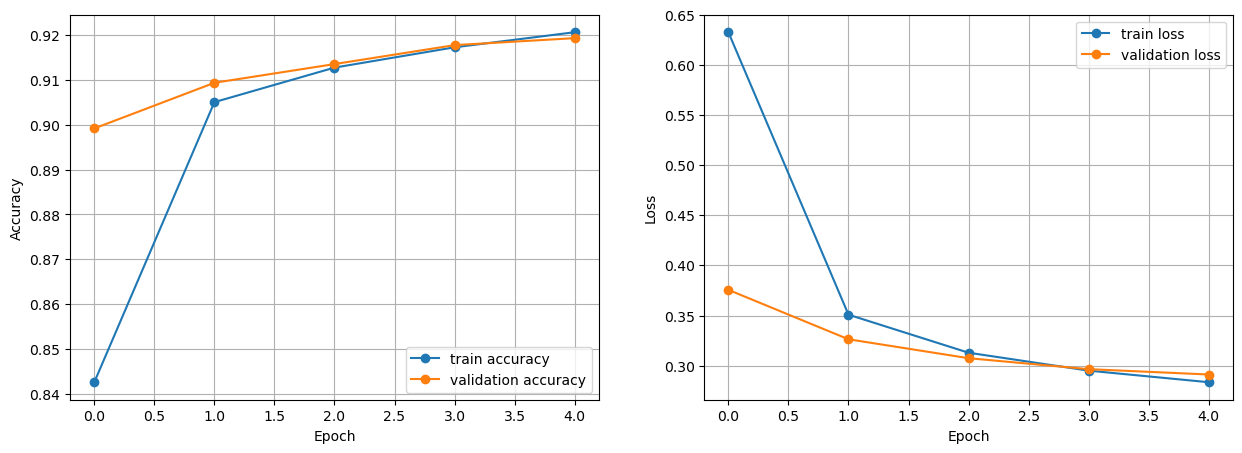

In [20]:
#ADAM

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(a.history['accuracy'], 'o-', label='train accuracy')
plt.plot(a.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(a.history['loss'], 'o-', label='train loss')
plt.plot(a.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

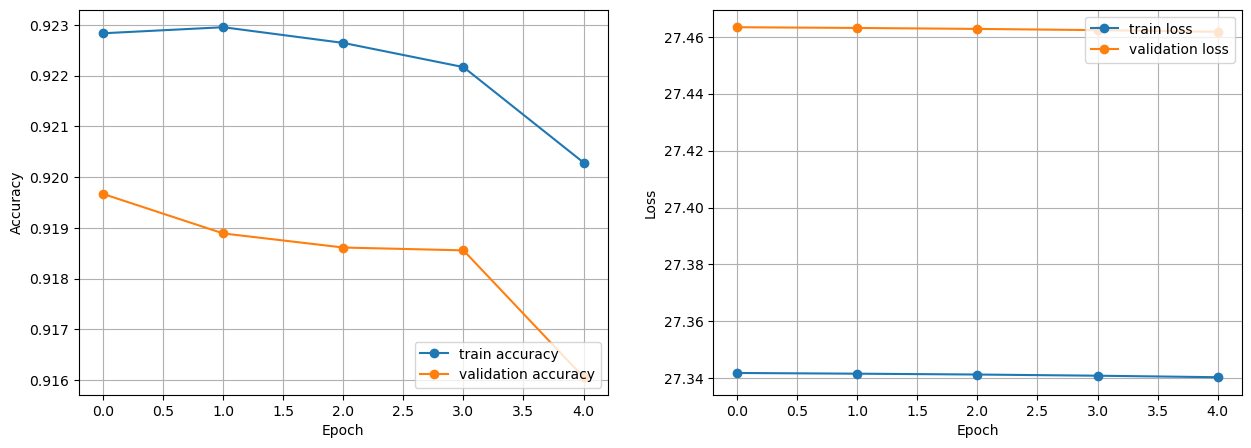

In [21]:
#SGD

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(b.history['accuracy'], 'o-', label='train accuracy')
plt.plot(b.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(b.history['loss'], 'o-', label='train loss')
plt.plot(b.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()